In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
import numpy as np

In [2]:
file_path_improved = './Exercise 1 - Improved.txt'
file_path_naive = './Exercise 1 - Naive.txt'

data_improved = pd.read_csv(file_path_improved, delimiter='\t')
similarity_values_improved = data_improved['Similarity'].tolist()
labels_improved = data_improved['Label'].tolist()



data_naive = pd.read_csv(file_path_naive, delimiter='\t')
similarity_values_naive = data_naive['Similarity'].tolist()
labels_naive = data_naive['Label'].tolist()

threshold_values = np.arange(0.1, 1.01, 0.01).tolist() 

### Ex.1


#### Actual Condition:

Positive: Indicates the presence of a shot boundary (denoted as "shot" in the text file). \
Negative: Indicates the absence of a shot boundary (denoted as "noshot" in the text file).


#### Predicted Condition:

True: Predicting the presence of a shot boundary based on a chosen threshold applied to the similarity values between consecutive frames. \
False: Predicting the absence of a shot boundary based on a chosen threshold applied to the similarity values between consecutive frames.

#### Model:
True Positive (TP):
These are the cases where the model correctly predicts the positive class (e.g., "shot" in our case) as positive. 
True Negative (TN):
These are the cases where the model correctly predicts the negative class (e.g., "noshot" in our case) as negative. 

False Positive (FP):
These are the cases where the model incorrectly predicts the negative class as positive. In other words, the model predicts "shot" when the actual label is "noshot." 

False Negative (FN):
These are the cases where the model incorrectly predicts the positive class as negative. In our context, it's when the model predicts "noshot" when the actual label is "shot."

### Ex.2

In [3]:
def compute_confusion_matrix(similarity_values, labels, threshold):
    # Initialize values for confusion matrix
    TP = TN = FP = FN = 0

    # Calculate True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
    for i in range(len(similarity_values) - 1):
        if similarity_values[i] >= threshold:
            value = 'noshot'
        else:
            value = 'shot'

        if labels[i] == 'shot':
            if value == 'shot':
                TP += 1
            else:
                FN += 1
        elif labels[i] == 'noshot':
            if value == 'noshot':
                TN += 1
            else:
                FP += 1

    # Calculate Sensitivity (True Positive Rate or TPR), Specificity (True Negative Rate or TNR), Accuracy (ACC)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0

    # Calculate False Discovery Rate (FDR)
    FDR = FP / (TP + FP) if (TP + FP) > 0 else 0

    # Calculate False Positive Rate (FPR)
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

    # Return values including FPR and FDR
    return {
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'Sensitivity (TPR)': sensitivity,
        'Specificity (TNR)': specificity,
        'Accuracy': accuracy,
        'False Positive Rate (FPR)': FPR,
    }

In [5]:
results = compute_confusion_matrix(similarity_values_improved, labels_improved, 0.5)
print("Confusion Matrix:")
print("TP:", results['TP'])
print("TN:", results['TN'])
print("FP:", results['FP'])
print("FN:", results['FN'])
print("Sensitivity (TPR):", results['Sensitivity (TPR)'])
print("Specificity (TNR):", results['Specificity (TNR)'])
print("Accuracy:", results['Accuracy'])
print("FPR:", results['False Positive Rate (FPR)'])

Confusion Matrix:
TP: 45
TN: 140
FP: 0
FN: 14
Sensitivity (TPR): 0.7627118644067796
Specificity (TNR): 1.0
Accuracy: 0.9296482412060302
FPR: 0.0


### Ex.3

#### Naive method to build a roc curve

In [6]:
def compute_roc_curve_with_specific_thresholds(similarity_values, labels, threshold_values):
    TPR_values = []
    FPR_values = []

    for threshold in threshold_values:
        metrics = compute_confusion_matrix(similarity_values, labels, threshold)
        TPR = metrics['Sensitivity (TPR)']
        FPR = metrics['False Positive Rate (FPR)']
        TPR_values.append(TPR)
        FPR_values.append(FPR)

    plt.figure(figsize=(8, 6))
    plt.plot(FPR_values, TPR_values, marker='o', linestyle='-', label='ROC Curve')

    # Plot the random classifier (diagonal line)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

        # Annotate points with specific threshold values with step 0.1
    annotated_indices = [i for i, threshold in enumerate(threshold_values) if threshold != 0.89 and (i == 0 or i % 10 == 0)]
    for i in annotated_indices:
        plt.plot(FPR_values[i], TPR_values[i], marker='o', markersize=8, color='lightcoral')  # Plot red dot at annotated indices
        plt.text(FPR_values[i], TPR_values[i], f"{threshold_values[i]:.2f}", ha='right', va='bottom')

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

##### For naive algorithm:

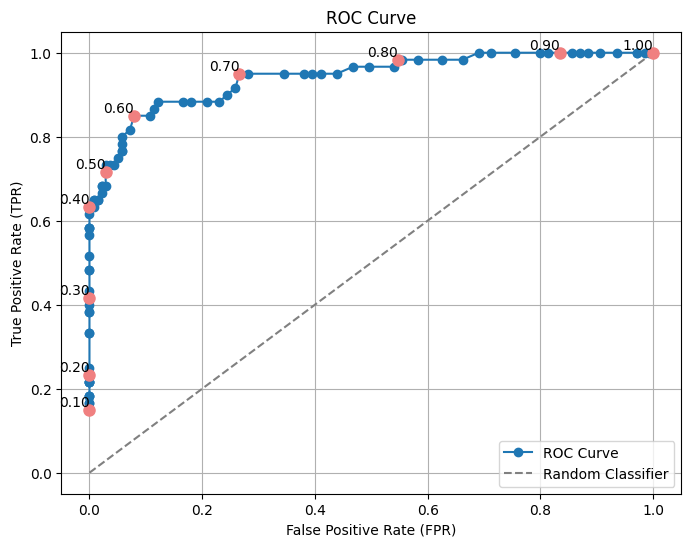

In [7]:
compute_roc_curve_with_specific_thresholds(similarity_values_naive, labels_naive, threshold_values)

Determine the range of thresholds:
For shot detection, you'd typically aim for a balance between precision (minimizing false positives) and recall (minimizing false negatives). So, we have to select a threshold that balances TPR and FPR. So, I would choose trashhold between 0.60 and 0.68 as the best range.

##### For improved version:

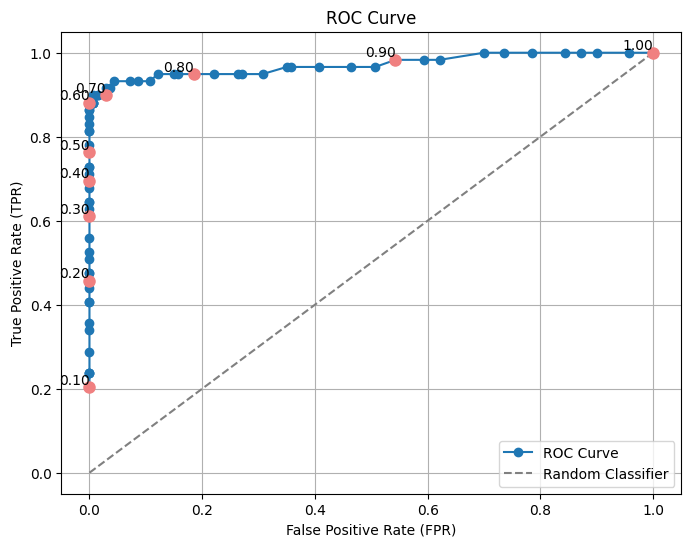

In [8]:
compute_roc_curve_with_specific_thresholds(similarity_values_improved, labels_improved, threshold_values)

Determine the range of thresholds: \
I would choose trashhold between 0.5 and 0.7 as the best range.

#### "More efficient method"

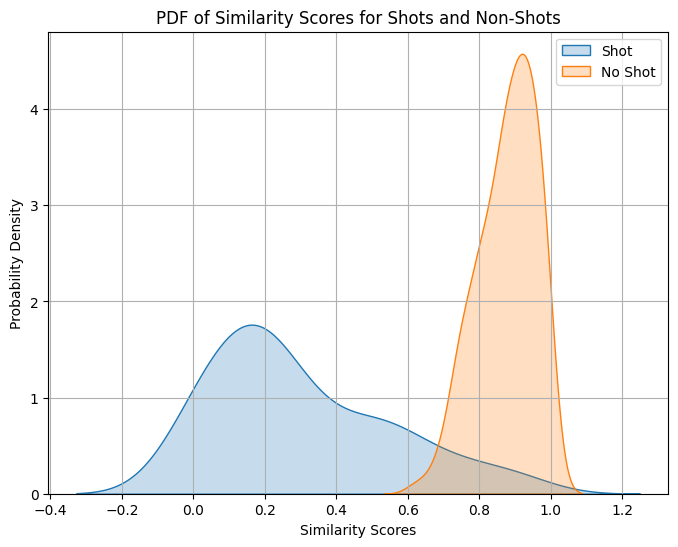

In [9]:

def plot_similarity_distribution_pdf(similarity_data, label_data):
    similarity_shot = [similarity_data[i] for i in range(len(similarity_data)) if label_data[i] == 'shot']
    similarity_noshot = [similarity_data[i] for i in range(len(similarity_data)) if label_data[i] == 'noshot']

    plt.figure(figsize=(8, 6))
    sns.kdeplot(similarity_shot, label='Shot', fill=True)
    sns.kdeplot(similarity_noshot, label='No Shot', fill=True)
    
    plt.xlabel('Similarity Scores')
    plt.ylabel('Probability Density')
    plt.title('PDF of Similarity Scores for Shots and Non-Shots')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_similarity_distribution_pdf(similarity_values_improved, labels_improved)

To do not interate through all the values we can look at the PDFs of similarity scores for shots and non-shots. Identify the region where the densities of the two classes significantly overlap or where there's a clear gap between the distributions. Based on the observed overlap or separation between the classes in the PDF plot, you might choose a threshold value that maximizes the separation or minimizes the overlap. This threshold could be where the two PDF curves intersect or where there's a noticeable drop or rise in density for one class compared to the other. Afterwards, we can plot on ROC-curve only interesting values.

### Ex.4

Accuracy is a commonly used performance measure. So we would select the threshold that maximizes the accuracy value, among with the meathods what I mentioned in prev section (Ex.3).

In [10]:
def find_the_best_accuracy(similarity_values, labels, threshold_values):
    best_accuracy = 0
    best_metrics = {}
    
    # Initialize lists to store data for the table
    data = []
    
    # Iterate through threshold values and compute metrics
    for threshold in threshold_values:
        metrics = compute_confusion_matrix(similarity_values, labels, threshold)
        accuracy = metrics['Accuracy']
        
        # Store the metrics if accuracy is the highest so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_metrics = metrics
        
        # Store data for the table
        data.append([threshold, accuracy, metrics['TP'], metrics['FP'], metrics['FN'], metrics['TN'], 
                     metrics['Sensitivity (TPR)'], metrics['False Positive Rate (FPR)']])
    
    # Create a DataFrame
    columns = ['Threshold', 'Accuracy', 'TP', 'FP', 'FN', 'TN', 'TPR', 'FPR']
    df = pd.DataFrame(data, columns=columns)
    
    # Highlight row with best accuracy
    best_row_idx = df['Accuracy'].idxmax()
    styled_df = df.style.apply(lambda x: ['background: #ccffcc' if x.name == best_row_idx else '' for _ in x], axis=1)
    
    # Display the styled DataFrame
    return styled_df

In [11]:
find_the_best_accuracy(similarity_values_improved, labels_improved, threshold_values)

,Threshold,Accuracy,TP,FP,FN,TN,TPR,FPR
0,0.100000,0.763819,12,0,47,140,0.203390,0.000000
1,0.110000,0.773869,14,0,45,140,0.237288,0.000000
2,0.120000,0.773869,14,0,45,140,0.237288,0.000000
3,0.130000,0.773869,14,0,45,140,0.237288,0.000000
4,0.140000,0.788945,17,0,42,140,0.288136,0.000000
5,0.150000,0.804020,20,0,39,140,0.338983,0.000000
6,0.160000,0.809045,21,0,38,140,0.355932,0.000000
7,0.170000,0.824121,24,0,35,140,0.406780,0.000000
8,0.180000,0.824121,24,0,35,140,0.406780,0.000000
9,0.190000,0.834171,26,0,33,140,0.440678,0.000000


Trashhold: 0.600000, what is agrees with roc-curve and PDF plots.

In [12]:
find_the_best_accuracy(similarity_values_naive, labels_naive, threshold_values)

,Threshold,Accuracy,TP,FP,FN,TN,TPR,FPR
0,0.100000,0.743719,9,0,51,139,0.150000,0.000000
1,0.110000,0.748744,10,0,50,139,0.166667,0.000000
2,0.120000,0.748744,10,0,50,139,0.166667,0.000000
3,0.130000,0.753769,11,0,49,139,0.183333,0.000000
4,0.140000,0.753769,11,0,49,139,0.183333,0.000000
5,0.150000,0.753769,11,0,49,139,0.183333,0.000000
6,0.160000,0.763819,13,0,47,139,0.216667,0.000000
7,0.170000,0.763819,13,0,47,139,0.216667,0.000000
8,0.180000,0.763819,13,0,47,139,0.216667,0.000000
9,0.190000,0.763819,13,0,47,139,0.216667,0.000000


Trashhold: 0.51, what is also agrees with roc-curve and PDF plots.

### Ex. 5

In [13]:
def calculate_auc(similarity_values, labels, threshold_values):
    TPR_values = []
    FPR_values = []

    for threshold in threshold_values:
        metrics = compute_confusion_matrix(similarity_values, labels, threshold)
        TPR = metrics['Sensitivity (TPR)']
        FPR = metrics['False Positive Rate (FPR)']
        TPR_values.append(TPR)
        FPR_values.append(FPR)
        
    n = len(TPR_values)
    auc = 0.0

    # Compute AUC using the trapezoidal rule
    for i in range(1, n):
        auc += (FPR_values[i] - FPR_values[i - 1]) * (TPR_values[i] + TPR_values[i - 1]) / 2

    return auc

In [14]:
auc_manual = calculate_auc(similarity_values_naive, labels_naive, threshold_values)
print(f"Naive methods AUC: {auc_manual:.4f}")


auc_manual = calculate_auc(similarity_values_improved, labels_improved, threshold_values)
print(f"Improved methods AUC: {auc_manual:.4f}")

Naive methods AUC: 0.9420
Improved methods AUC: 0.9711


The AUC summarizes the model's performance across all thresholds, providing a single value representing its discriminative ability.
It relates to previous calculations (like TPR, FPR, accuracy, etc.) by offering a comprehensive evaluation of the model's ability to differentiate between classes across all possible threshold values.

#### Ex *

While it might not be the most precise method in terms of accuracy (especially when dealing with irregular or jagged ROC curves), it's computationally efficient and often sufficient for practical purposes. The trapezoidal rule directly operates on the sorted TPR and FPR values, avoiding the need to iterate through multiple thresholds, making it more efficient than threshold-based computations.

Efficiant way to do (almost) all aforementioned, we can use sklearn.metrics.roc_auc_score and sklearn.metrics.roc_curve and obtain the similar results.